<a href="https://colab.research.google.com/github/kridtapon/TSI-EMA-Pulse/blob/main/TSI_EMA_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [1]:
pip install --upgrade yfinance

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Trend Strength Indicator (TSI)
def calculate_tsi(df, long_period=25, short_period=13):
    """
    Calculate Trend Strength Indicator (TSI).
    """
    diff = df['Close'].diff()
    abs_diff = abs(diff)

    smoothed_diff = diff.ewm(span=short_period).mean().ewm(span=long_period).mean()
    smoothed_abs_diff = abs_diff.ewm(span=short_period).mean().ewm(span=long_period).mean()

    tsi = 100 * (smoothed_diff / smoothed_abs_diff)
    return tsi

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(df, period=21):
    """
    Calculate Exponential Moving Average (EMA).
    """
    return df['Close'].ewm(span=period).mean()

# Define the stock symbol and time period
symbol = 'TSLA'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate TSI
df['TSI'] = calculate_tsi(df, 21, 6)

# Calculate 21-period EMA using the function
df['EMA'] = calculate_ema(df, period=6)

# Define Entry and Exit signals based on TSI and EMA pullbacks
df['Entry'] = (df['TSI'] > 0) & (df['Close'] > df['EMA'])
df['Exit'] = (df['TSI'] < 0) & (df['Close'] < df['EMA'])

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                          2990063.716261
Total Return [%]                      2890.063716
Benchmark Return [%]                  1307.892888
Max Gross Exposure [%]                      100.0
Total Fees Paid                       71672.05577
Max Drawdown [%]                        37.532084
Max Drawdown Duration                       350.0
Total Trades                                   25
Total Closed Trades                            24
Total Open Trades                               1
Open Trade PnL                      994966.247844
Win Rate [%]                            54.166667
Best Trade [%]                         223.607373
Worst Trade [%]                        -10.630172
Avg Winning Trade [%]                   41.110282
Avg Losing Trade [%]                    -6.027134


Streaming output truncated to the last 5000 lines.
<ipython-input-20-0a2093cf06aa>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-0a2093cf06aa>:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-0a2093cf06aa>:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Parameters: TSI Long: 21, TSI Short: 6, EMA: 6


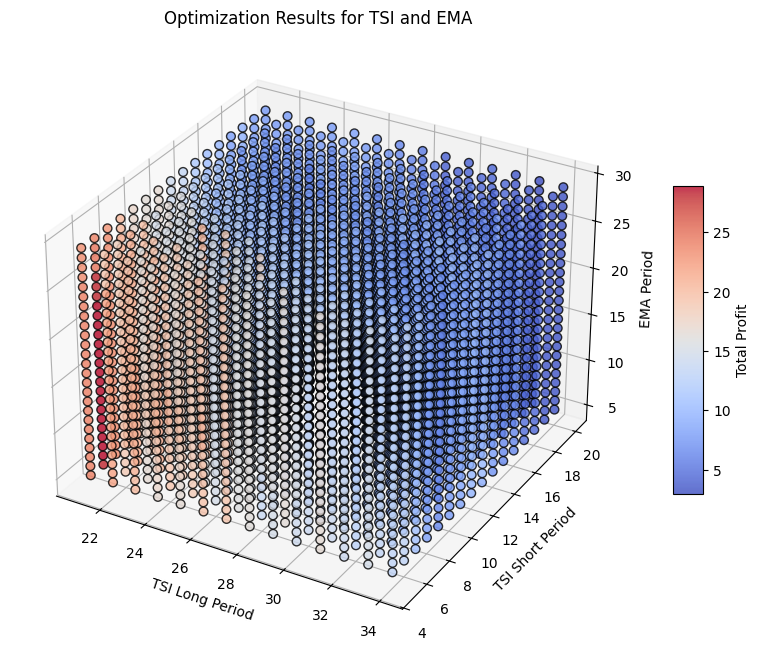

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

# Function to calculate Trend Strength Indicator (TSI)
def calculate_tsi(df, long_period=25, short_period=13):
    diff = df['Close'].diff()
    abs_diff = abs(diff)
    smoothed_diff = diff.ewm(span=short_period).mean().ewm(span=long_period).mean()
    smoothed_abs_diff = abs_diff.ewm(span=short_period).mean().ewm(span=long_period).mean()
    tsi = 100 * (smoothed_diff / smoothed_abs_diff)
    return tsi

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(df, period=21):
    return df['Close'].ewm(span=period).mean()

# Define the stock symbol and time period
symbol = 'TSLA'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define parameter ranges
tsi_short_range = range(5, 21)
tsi_long_range = range(21, 35)
ema_range = range(5, 30)

# Store results
results = []
best_params = None
best_performance = -np.inf

# Grid search for best parameters
for long_period, short_period, ema_period in product(tsi_long_range, tsi_short_range, ema_range):
    df['TSI'] = calculate_tsi(df, long_period, short_period)
    df['EMA'] = calculate_ema(df, period=ema_period)

    # Filter data for the test period (2020-2025)
    df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    df_filter['Entry'] = (df_filter['TSI'] > 0) & (df_filter['Close'] > df_filter['EMA'])
    df_filter['Exit'] = (df_filter['TSI'] < 0) & (df_filter['Close'] < df_filter['EMA'])

    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'],
        entries=df_filter['Entry'],
        exits=df_filter['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    final_value = portfolio.total_return()
    results.append((long_period, short_period, ema_period, final_value))

    if final_value > best_performance:
        best_performance = final_value
        best_params = (long_period, short_period, ema_period)

# Print best parameters
print(f"Best Parameters: TSI Long: {best_params[0]}, TSI Short: {best_params[1]}, EMA: {best_params[2]}")

# Convert results to numpy array
results = np.array(results)
xs, ys, zs, profits = results[:, 0], results[:, 1], results[:, 2], results[:, 3]

# Plot results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(xs, ys, zs, c=profits, cmap='coolwarm', s=40, alpha=0.8, edgecolors='k')

# Add color bar for better visualization
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Total Profit')

# Labels and title
ax.set_xlabel('TSI Long Period')
ax.set_ylabel('TSI Short Period')
ax.set_zlabel('EMA Period')
ax.set_title('Optimization Results for TSI and EMA')

plt.show()
